In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations


In [3]:
# load datafiles
fnames = [
    '/Users/georgeau/Desktop/research_data/local_macbook/intermediate_transporter2/20220211_140800_intermediate_transporter/intermediate_transporter_2_20220211_140800_data.csv',
    '/Users/georgeau/Desktop/research_data/local_macbook/intermediate_transporter2/20220211_141358_intermediate_transporter/intermediate_transporter_2_20220211_141358_data.csv',
    '/Users/georgeau/Desktop/research_data/local_macbook/intermediate_transporter2/20220211_141442_intermediate_transporter/intermediate_transporter_2_20220211_141442_data.csv',
]
model_ids = ['p_center', 'p_ref', 'p_rand']
n_cols = 16

D_list = []
col_list = [i+1 for i in range(n_cols)]  # only keep columns 1...n_p-1 

for f in fnames:
    D_tmp = np.genfromtxt(f, delimiter=',', skip_header=1,usecols=col_list).T  
    D_list.append(D_tmp)

logl_list = []
for i in range(len(D_list)):
    logl_list.append(D_list[i][-1])  # logl is last row in .csv file
logl = np.array(logl_list)
print(logl.shape)


(2, 2500000)


In [4]:
# prepare logl distributions
logl_max = logl.max()
logl_rel = logl - logl_max
print(logl.min(),logl.max())
print(logl_rel.max())
print(logl_rel.shape)

for i in range(len(logl_rel)):
    print(f'model {i+1} relative log-likelihood')
    print(f'range: ({np.min(logl_rel[i])},{np.max(logl_rel[i])})')
    print(f'mean: {np.mean(logl_rel[i])}, median: {np.median(logl_rel[i])}')
    print(f'std: {np.std(logl_rel[i])}\n')


14241.474549704511 14284.624361964525
0.0
(2, 2500000)
model 1 relative log-likelihood
range: (-43.14981226001328,-3.246196245401734)
mean: -11.687592909162722, median: -11.40991991246301
std: 3.8482841317078695

model 2 relative log-likelihood
range: (-26.72761346471816,0.0)
mean: -6.02427009155824, median: -5.832198684936884
std: 2.7576037092779857



(-43.14981226001328, 0.0)


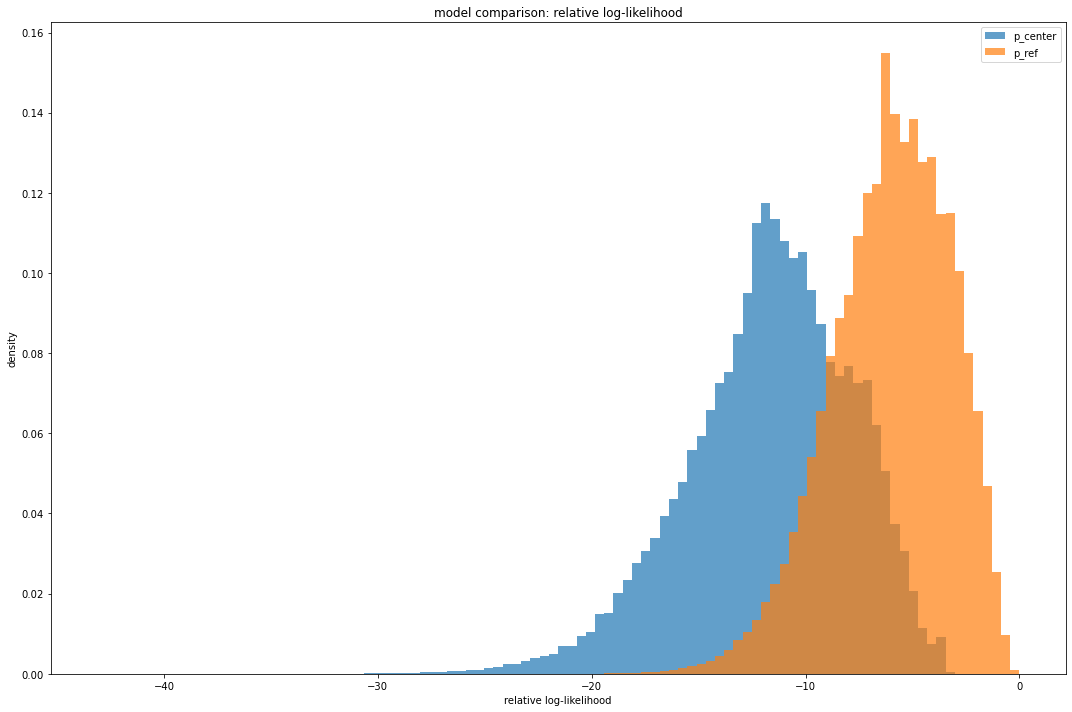

In [5]:
# plot relative log likelihood
h_range = (logl_rel.min(), logl_rel.max())
bins = 100
h_list = []
e_list = []
print(h_range)

fig= plt.figure(figsize=(15,10))
ax = plt.axes()
for i in range(logl_rel.shape[0]):
    logl_tmp = logl_rel[i]
    hist_tmp, edges_tmp = np.histogram(logl_tmp, bins=bins, range=h_range, density=True)  # make histogram (density)
    h_list.append(hist_tmp)
    e_list.append(edges_tmp)
    plt.bar(edges_tmp[:-1], hist_tmp, width=np.diff(edges_tmp), align='edge',alpha = 0.7, label=model_ids[i])  # plot histogram
plt.legend()
plt.title('model comparison: relative log-likelihood')
plt.xlabel('relative log-likelihood')
plt.ylabel('density')
#plt.ylim(0,0.1)
#plt.xlim(-100,0.1)
plt.tight_layout()

def calc_ovl(h1,h2,b_w):
    'calculates OVL for 2 histograms with equal bin widths (b_w)'
    y = []
    assert(len(h1)==len(h2))
    for i in range(len(h1)):
        y_i = np.min([h1[i]*b_w,h2[i]*b_w])
        y.append(y_i)
    return np.sum(y)

for i in range(len(model_ids)):
    h_1 = h_list[i]
    b_w = np.abs(e_list[i][1]-e_list[i][0])  # warning! using last edges list 
    h_list_tmp =  h_list.copy()
    h_list_tmp.pop(i)
    ovl_tmp_list = []
    for h_tmp in h_list_tmp:
        ovl_tmp_list.append(f'{calc_ovl(h_1,h_tmp,b_w):.2f}')
    # plt.text(0.05,0.85-(i*.025), f'{model_ids[i]} overlap (min, max): ({min(ovl_tmp_list)}, {max(ovl_tmp_list)})', transform=ax.transAxes)

plt.savefig('model_comparison_test2.png')

[1.39053336 1.39053336 1.39053336 ... 1.76836635 1.76836635 1.76836635]
[0.1995343  0.1995343  0.1995343  ... 1.0712568  1.0712568  1.53705977]


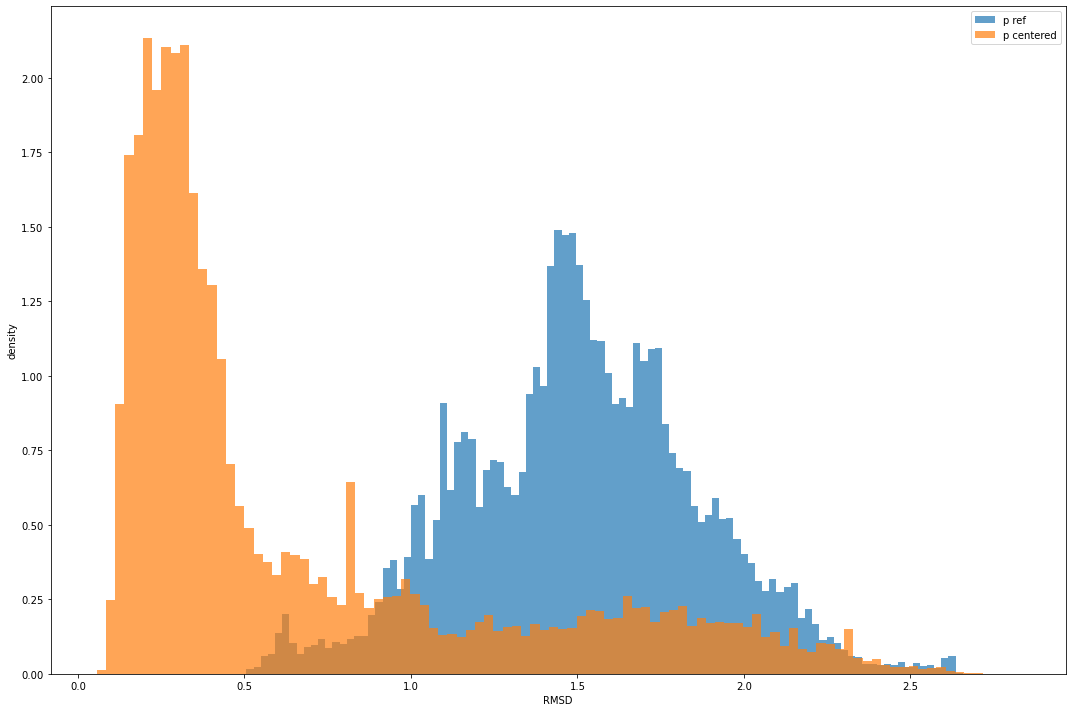

In [6]:
def rmsd(y1,y2):
    return np.sqrt(np.mean(np.square(y1-y2)))

p_ref = np.array([10, 3.0, 3.0, 7.0, 2.0, 2.0, 2.0, 2.0, 7.0, 3.0, 3.0, 0.0, 7.0, 4.0, 1e-13])
D1 = np.transpose(D_list[0][:-1])
D2 = np.transpose(D_list[1][:-1])

rmsd_1 = []
for i in range(len(D1)):
    rmsd_tmp = rmsd(D1[i],p_ref)
    rmsd_1.append(rmsd_tmp)

rmsd_2 = []
for i in range(len(D2)):
    rmsd_tmp = rmsd(D2[i],p_ref)
    rmsd_2.append(rmsd_tmp)

x1 = np.array(rmsd_1)
x2 = np.array(rmsd_2)

fig= plt.figure(figsize=(15,10))
ax = plt.axes()

print(x1)
hist_tmp, edges_tmp = np.histogram(x1, bins=100, density=True)  # make histogram (density)
plt.bar(edges_tmp[:-1], hist_tmp, width=np.diff(edges_tmp), align='edge',alpha = 0.7, label='p ref')  # plot histogram

print(x2)
hist_tmp2, edges_tmp2 = np.histogram(x2, bins=100, density=True)  # make histogram (density)
plt.bar(edges_tmp2[:-1], hist_tmp2, width=np.diff(edges_tmp2), align='edge',alpha = 0.7, label='p centered')  # plot histogram

plt.legend()
plt.ylabel('density')
plt.xlabel('RMSD')
plt.tight_layout()

# h_list.append(hist_tmp)
# e_list.append(edges_tmp)
# plt.bar(edges_tmp[:-1], hist_tmp, width=np.diff(edges_tmp), align='edge',alpha = 0.7, label=model_ids[i])  # plot histogram
# plt.legend()
# plt.title('model comparison: relative log-likelihood')
# plt.xlabel('relative log-likelihood')
# plt.ylabel('density')
# #plt.ylim(0,0.1)
# #plt.xlim(-100,0.1)
# plt.tight_layout()



[(7, 13), (0, 6), (0, 6), (4, 10), (-1, 5), (-1, 5), (-1, 5), (-1, 5), (4, 10), (0, 6), (0, 6), (0, 6), (7, 13), (4, 10), (5e-14, 1.5000000000000002e-13)]
[1.e+01 3.e+00 3.e+00 7.e+00 2.e+00 2.e+00 2.e+00 2.e+00 7.e+00 3.e+00
 3.e+00 0.e+00 7.e+00 4.e+00 1.e-13]
[[9.85024476e+00 3.08713237e+00 3.05457521e+00 ... 4.21261451e+00
  1.01719483e-13 1.42803507e+04]
 [9.85024476e+00 3.08713237e+00 3.05457521e+00 ... 4.21261451e+00
  1.01719483e-13 1.42803507e+04]
 [9.85024476e+00 3.08713237e+00 3.05457521e+00 ... 4.21261451e+00
  1.01719483e-13 1.42803507e+04]
 ...
 [1.02248160e+01 3.24784094e+00 3.81731472e+00 ... 6.06332900e+00
  9.66084196e-14 1.42782021e+04]
 [1.02248160e+01 3.24784094e+00 3.81731472e+00 ... 6.06332900e+00
  9.66084196e-14 1.42782021e+04]
 [1.01627849e+01 3.23161774e+00 4.06057896e+00 ... 6.88724476e+00
  9.80187815e-14 1.42774039e+04]]


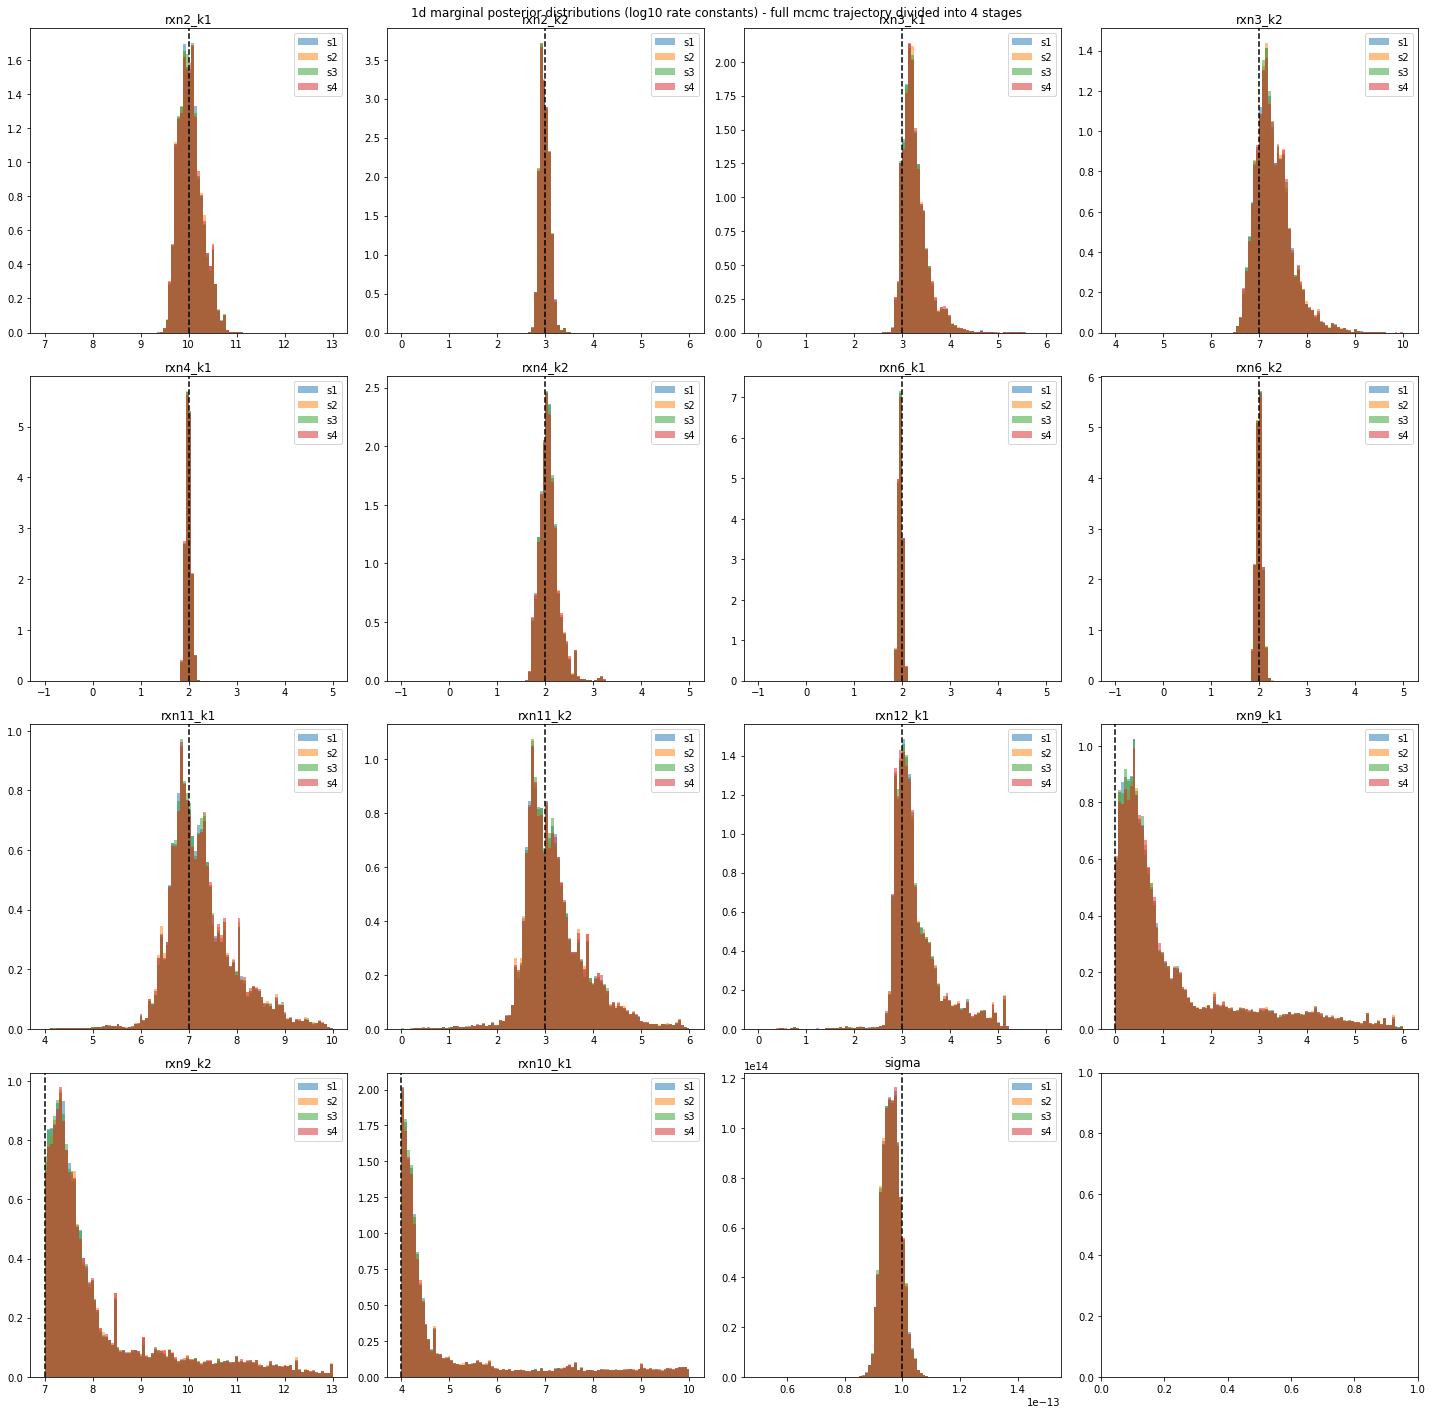

In [7]:
n_dim = 15

s=0
sigma_ref = 1e-13
k_H_on = np.log10(1e10)
k_H_off = np.log10(1e3)
k_S_on = np.log10(1e7)
k_S_off = np.log10(1e3)
k_conf = np.log10(1e2)

k_conf_range = (-1-s,5)
k_H_on_range = (7-s,13)
k_H_off_range = (0-s,6)
k_S_on_range = (4-s,10)
k_S_off_range = (0-s,6)
# sigma_range = (np.log10(5e-14,5e-13))
sigma_range = ((1e-13 - (1e-13*0.5)), (1e-13 + (1e-13*0.5)))


### boundary ranges
bounds=[0]*n_dim

# rxn2: OF + $H_out -> OF_Hb; vol*(rxn2_k1*OF*H_out - rxn2_k2*OF_Hb)
bounds[0] = k_H_on_range # rxn2_k1
bounds[1] = k_H_off_range  # rxn2_k2

# rxn3: OF_Sb -> OF + $S_out; vol*(rxn3_k1*OF_Sb - rxn3_k2*OF*S_out)
bounds[2] = k_S_off_range  # rxn3_k1
bounds[3] = k_S_on_range # rxn3_k2

# rxn4: OF_Hb -> IF_Hb; vol*(rxn4_k1*OF_Hb - rxn4_k2*IF_Hb)
bounds[4] = k_conf_range # rxn4_k1
bounds[5] = k_conf_range # rxn4_k2

# rxn6: IF_Sb -> OF_Sb; vol*(rxn6_k1*IF_Sb - rxn6_k2*OF_Sb)
bounds[6] = k_conf_range # rxn6_k1
bounds[7] = k_conf_range # rxn6_k2

# rxn11: IF_Hb + S_in -> IF_Hb_Sb; vol*(rxn11_k1*IF_Hb*S_in - rxn11_k2*IF_Hb_Sb)
bounds[8] = k_S_on_range  # rxn11_k1
bounds[9] = k_S_off_range   # rxn11_k2    

# rxn12: IF_Hb_Sb -> IF_Sb + H_in; vol*(rxn12_k1*IF_Hb_Sb - rxn12_k2*IF_Sb*H_in)
bounds[10] = k_H_off_range  # rxn12_k1
# bounds[11] = k_H_on_range  # rxn12_k2    

# rxn9: IF_Hb -> IF + H_in; vol*(rxn9_k1*IF_Hb - rxn9_k2*IF*H_in)
bounds[11] = k_H_off_range  # rxn9_k1
bounds[12] = k_H_on_range   # rxn9_k2   

# rxn10: IF + S_in -> IF_Sb; vol*(rxn10_k1*IF*S_in - rxn10_k2*IF_Sb)
bounds[13] = k_S_on_range   # rxn10_k1 

# experimental noise
# bounds[12] = sigma_range # sigma  
bounds[14] = sigma_range # sigma  
print(bounds)


### reference values
p_ref = np.zeros(n_dim)

# rxn2: OF + $H_out -> OF_Hb; vol*(rxn2_k1*OF*H_out - rxn2_k2*OF_Hb)
p_ref[0] = k_H_on_range[0] # rxn2_k1
p_ref[1] = k_H_off_range[0]  # rxn2_k2

# rxn3: OF_Sb -> OF + $S_out; vol*(rxn3_k1*OF_Sb - rxn3_k2*OF*S_out)
p_ref[2] = k_S_off_range[0]  # rxn3_k1
p_ref[3] = k_S_on_range[0] # rxn3_k2

# rxn4: OF_Hb -> IF_Hb; vol*(rxn4_k1*OF_Hb - rxn4_k2*IF_Hb)
p_ref[4] = k_conf_range[0] # rxn4_k1
p_ref[5] = k_conf_range[0] # rxn4_k2

# rxn6: IF_Sb -> OF_Sb; vol*(rxn6_k1*IF_Sb - rxn6_k2*OF_Sb)
p_ref[6] = k_conf_range[0] # rxn6_k1
p_ref[7] = k_conf_range[0] # rxn6_k2

# rxn11: IF_Hb + S_in -> IF_Hb_Sb; vol*(rxn11_k1*IF_Hb*S_in - rxn11_k2*IF_Hb_Sb)
p_ref[8] = k_S_on_range[0] # rxn11_k1
p_ref[9] = k_S_off_range[0]   # rxn11_k2    

# rxn12: IF_Hb_Sb -> IF_Sb + H_in; vol*(rxn12_k1*IF_Hb_Sb - rxn12_k2*IF_Sb*H_in)
p_ref[10] = k_H_off_range[0] # rxn12_k1
# p_ref[11] = k_H_on_range[0]  # rxn12_k2    

# rxn9: IF_Hb -> IF + H_in; vol*(rxn9_k1*IF_Hb - rxn9_k2*IF*H_in)
p_ref[11] = k_H_off_range[0]  # rxn9_k1
p_ref[12] = k_H_on_range[0]   # rxn9_k2   

# rxn10: IF + S_in -> IF_Sb; vol*(rxn10_k1*IF*S_in - rxn10_k2*IF_Sb)
p_ref[13] = k_S_on_range[0]   # rxn10_k1 

# experimental noise
p_ref[14] = sigma_range[0] # sigma

# update selected parameters reference values 
p_ref[0] = k_H_on
p_ref[1] = k_H_off
p_ref[2] = k_S_off
p_ref[3] = k_S_on
p_ref[4] = k_conf
p_ref[5] = k_conf
p_ref[6] = k_conf
p_ref[7] = k_conf
p_ref[8] = k_S_on
p_ref[9] = k_S_off
p_ref[10] = k_H_off

p_ref[14] = sigma_ref
print(p_ref)


labels = [
    'rxn2_k1',
    'rxn2_k2',
    'rxn3_k1',
    'rxn3_k2',
    'rxn4_k1',
    'rxn4_k2',
    'rxn6_k1',
    'rxn6_k2',
    'rxn11_k1',
    'rxn11_k2',
    'rxn12_k1',
    'rxn9_k1',
    'rxn9_k2',
    'rxn10_k1',
    'sigma'
]


# plot traces
D1 = np.transpose(D_list[1])

print(D1)
h1,e1 = np.histogram(D1)

fig, axes = plt.subplots(4,4, figsize=(20,20))
ax = axes.flatten()

d_dict = {}

ref_idx_list = [0,1,2,3,4,5,6,7,8,9,10,14]
#flat_samples_T = np.transpose(flat_samples)
flat_samples_T = D_list[1]
for i, lbl in enumerate(labels):
    p_data = flat_samples_T[i]
    d_dict[lbl] = p_data
    s1,s2,s3,s4 = np.array_split(p_data, 4)  # divide into 4 chunks
    

    if i in ref_idx_list:

        ax[i].hist(s1, alpha=0.5, bins=100, range=bounds[i],  density=True, label='s1')
        ax[i].hist(s2, alpha=0.5, bins=100, range=bounds[i],  density=True, label='s2')
        ax[i].hist(s3, alpha=0.5, bins=100, range=bounds[i],  density=True, label='s3')
        ax[i].hist(s4, alpha=0.5, bins=100, range=bounds[i],  density=True, label='s4')
    else:
        ax[i].hist(s1, alpha=0.5, bins=100, range=bounds[i],  density=True, label='s1')
        ax[i].hist(s2, alpha=0.5, bins=100, range=bounds[i],  density=True, label='s2')
        ax[i].hist(s3, alpha=0.5, bins=100, range=bounds[i],  density=True, label='s3')
        ax[i].hist(s4, alpha=0.5, bins=100, range=bounds[i],  density=True, label='s4')
    ax[i].axvline(x=p_ref[i], ymin=0, ymax=1, color='black', ls='--')
    ax[i].set_title(f'{labels[i]}')
    ax[i].legend()
plt.suptitle('1d marginal posterior distributions (log10 rate constants) - full mcmc trajectory divided into 4 stages')
plt.tight_layout()


In [51]:

print(D_list[0].shape)
# s = self.chain.shape

#         return self._chain.reshape((s[0], -1, s[3]))


(16, 500000)


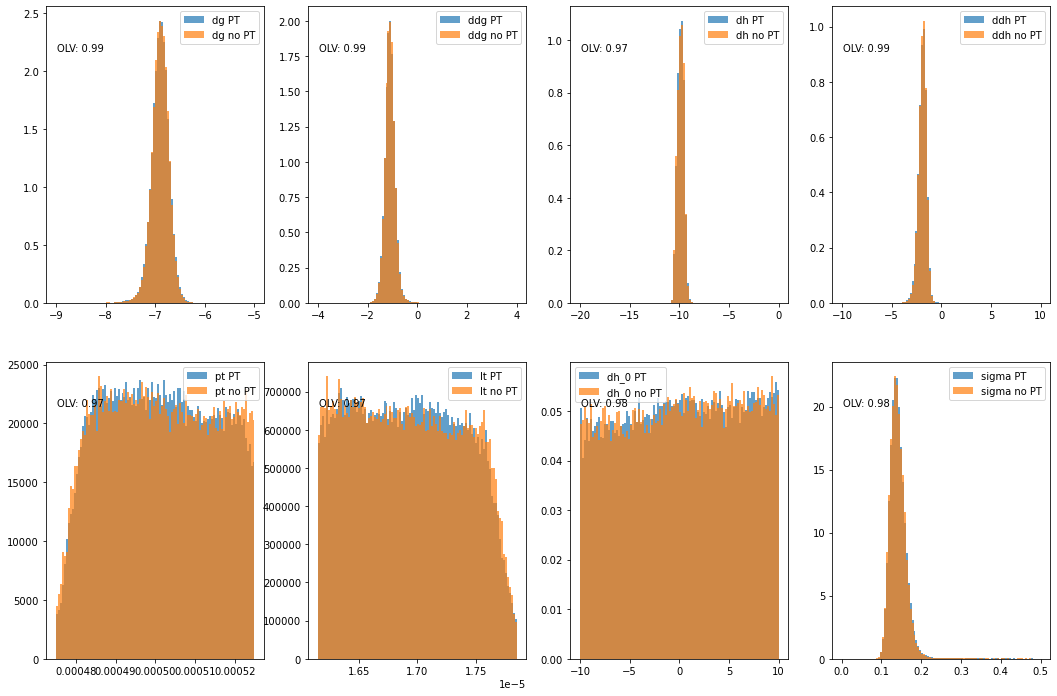

In [39]:
bins=100

bounds = [(-9,-5),(-4,4),(-20,0),(-10,10),(0.0005-0.0005*0.05,0.0005+0.0005*0.05), ((1.7e-05)-(1.7e-05)*0.05, (1.7e-05)+(1.7e-05)*0.05), (-10,10), (0.001,0.5)]
labels = ["dg", "ddg", "dh", "ddh", "pt", "lt", "dh_0", "sigma"]
fig, axs = plt.subplots(2, 4, figsize=(18,12))
ax = axs.flat
for i in range(len(labels)):
    x1_tmp = D_pt[i]
    x2_tmp = D_mc[i]
    hist_tmp1, edges_tmp1 = np.histogram(x1_tmp, bins=bins, range=bounds[i], density=True)  # make histogram (density)
    hist_tmp2, edges_tmp2 = np.histogram(x2_tmp, bins=bins, range=bounds[i], density=True)  # make histogram (density)
    ax[i].bar(edges_tmp1[:-1], hist_tmp1, width=np.diff(edges_tmp1),  align='edge',alpha = 0.7, label=f'{labels[i]} PT')  # plot histogram
    ax[i].bar(edges_tmp2[:-1], hist_tmp2, width=np.diff(edges_tmp2), align='edge',alpha = 0.7, label=f'{labels[i]} no PT')  # plot histogram
    ax[i].legend()

    def calc_ovl(h1,h2,b_w):
        'calculates OVL for 2 histograms with equal bin widths (b_w)'
        y = []
        assert(len(h1)==len(h2))
        for i in range(len(h1)):
            y_i = np.min([h1[i]*b_w,h2[i]*b_w])
            y.append(y_i)
        return np.sum(y)
    
    plt.text(0.05,0.85, f'OLV: {calc_ovl(hist_tmp1,hist_tmp2,np.diff(edges_tmp1)):.2f}', transform=ax[i].transAxes)

    